<a href="https://colab.research.google.com/github/nirvika28/AAPL-stock-pred-/blob/main/pgm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas flask matplotlib

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd

In [ ]:
def get_stock_data(ticker,start_date,end_date):
  stock_data=yf.download(ticker,start=start_date,end=end_date)
  return stock_data
X=get_stock_data("AAPL","2024-01-01","2024-12-31")
X.head(2)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500


In [ ]:
def preprocess(X):
  X=X.dropna()
  X['5-day MA'] = X['Close'].rolling(window=5).mean()
  X['10-day MA'] = X['Close'].rolling(window=10).mean()
  X['20-day MA'] = X['Close'].rolling(window=20).mean()
  return X
X=preprocess(X)
X.head()

Price,Close,High,Low,Open,Volume,5-day MA,10-day MA,20-day MA
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2024-01-02,184.290421,187.070068,182.553143,185.789438,82488700,NaN,NaN,NaN
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500,NaN,NaN,NaN
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600,NaN,NaN,NaN
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300,NaN,NaN,NaN
2024-01-08,184.211014,184.250731,180.180532,180.766239,59144500,182.372467,NaN,NaN


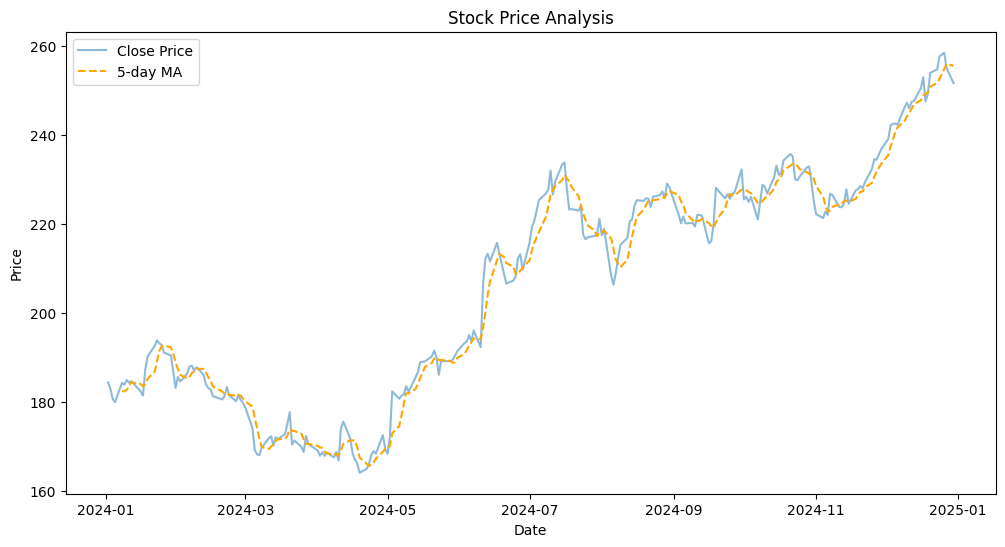

In [ ]:
import matplotlib.pyplot as plt
def visualize(X):
  plt.figure(figsize=(12,6))
  plt.plot(X['Close'],label='Close Price',alpha=0.5)
  plt.plot(X['5-day MA'],label='5-day MA',color='orange',linestyle='--')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Stock Price Analysis')
  plt.legend()
  plt.show()

visualize(X)


In [ ]:
from sklearn.model_selection import train_test_split

def prepare_data(X):
    # Define features and target
    X['Target'] = X['Close'].shift(-1)  # Predict the next day's closing price
    features = ['5-day MA', '10-day MA', '20-day MA']
    target = 'Target'

    # Drop rows with NaN values (from shifting)
    X = X.dropna()

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X[features], X[target], test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = prepare_data(X)

# Display shapes of datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (184, 3)
Testing Features Shape: (47, 3)
Training Target Shape: (184,)
Testing Target Shape: (47,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 11.82
R^2 Score: 0.98


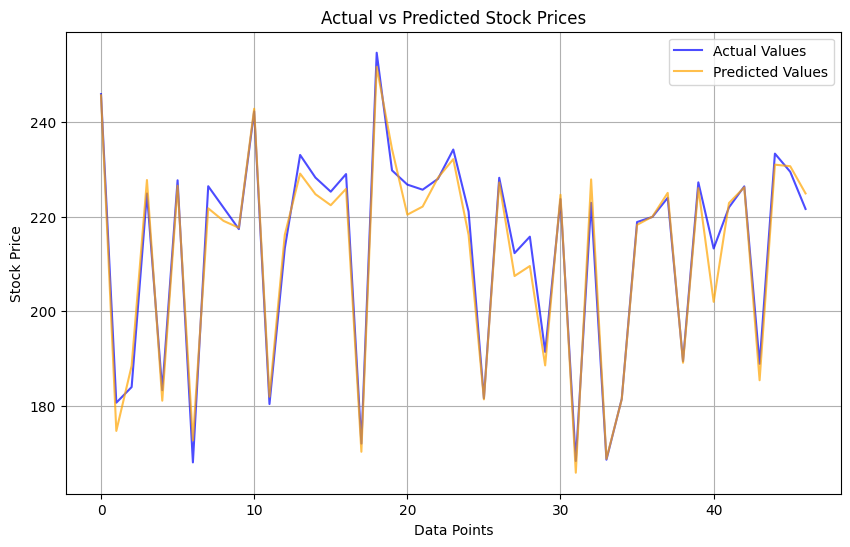

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', alpha=0.7, color='blue')
plt.plot(y_pred, label='Predicted Values', alpha=0.7, color='orange')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Display results
print("Cross-Validation Results:")
print(f"R^2 Scores: {cv_scores}")
print(f"Mean R^2 Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")


Cross-Validation Results:
R^2 Scores: [0.97778126 0.96949475 0.97840265 0.9694345  0.95825684]
Mean R^2 Score: 0.97
Standard Deviation: 0.01


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'stock_price_model.pkl')


['stock_price_model.pkl']

In [ ]:
!pip install flask-ngrok


In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null
!echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list
!sudo apt update && sudo apt install ngrok
!ngrok authtoken 2vDhqnRxY6MDZJPjBMkj4GBlphj_88LV9hSFBccx92DXiMPZX # Replace YOUR_NGROK_AUTH_TOKEN with your actual auth token
  # Replace YOUR_NGROK_AUTH_TOKEN with your actual auth token


deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ngrok-agent.s3.amazonaws.com buster InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
91 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipp

In [ ]:
!pip install flask pyngrok
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
import threading

app = Flask(__name__)

# Load the model
model = joblib.load('stock_price_model.pkl')

# List of features expected by the model
EXPECTED_FEATURES = ['5-day MA', '10-day MA', '20-day MA']

@app.route('/predict', methods=['POST'])
def predict():
    if not request.is_json:
        return jsonify({"error": "Request must be JSON"}), 400
    data = request.get_json()

    # Check for missing features
    missing = [f for f in EXPECTED_FEATURES if f not in data]
    if missing:
        return jsonify({"error": f"Missing features: {', '.join(missing)}"}), 400

    try:
        features = [[float(data[f]) for f in EXPECTED_FEATURES]]
        prediction = model.predict(features)
        return jsonify({'prediction': float(prediction[0])})
    except Exception as e:
        return jsonify({"error": f"Prediction failed: {str(e)}"}), 500

@app.route('/')
def home():
    return "Stock Prediction API - Send POST requests to /predict endpoint"

def run_flask():
    app.run(host="0.0.0.0", port=5000)

# Start Flask server in background
flask_thread = threading.Thread(target=run_flask)
flask_thread.daemon = True  # This thread will die when main thread exits
flask_thread.start()

# Give server a moment to start
import time
time.sleep(2)

# Set up ngrok tunnel
ngrok.kill()  # Clean up any existing tunnels
public_url = ngrok.connect(5000).public_url
print(f"\n\n ➜  Access your API at: {public_url}\n")
print(f" ➜  Test endpoint: {public_url}/predict")

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.




 ➜  Access your API at: https://75ff-34-23-166-228.ngrok-free.app

 ➜  Test endpoint: https://75ff-34-23-166-228.ngrok-free.app/predict
